In [1]:
import json
import collections

In [2]:
with open(r"C:\Users\cgokmen\Downloads\combined_room_object_list.json", "r") as f:
    data = json.load(f)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

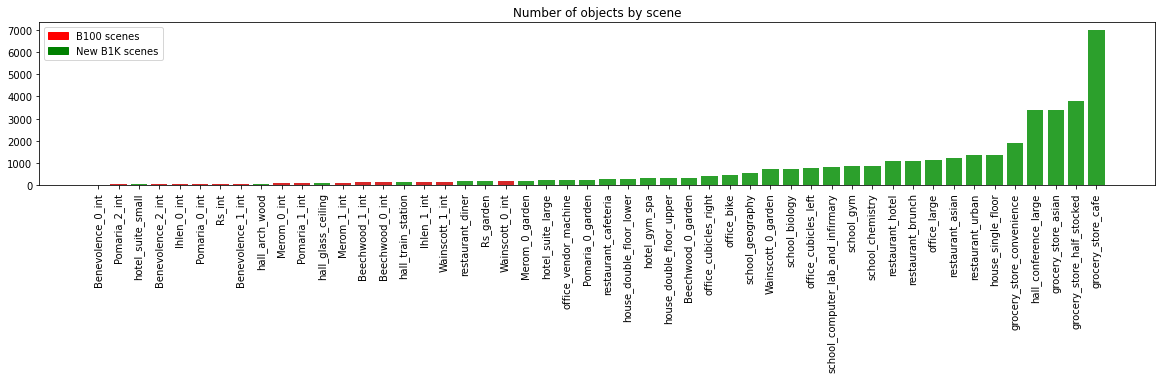

('grocery_store_cafe', 6994)


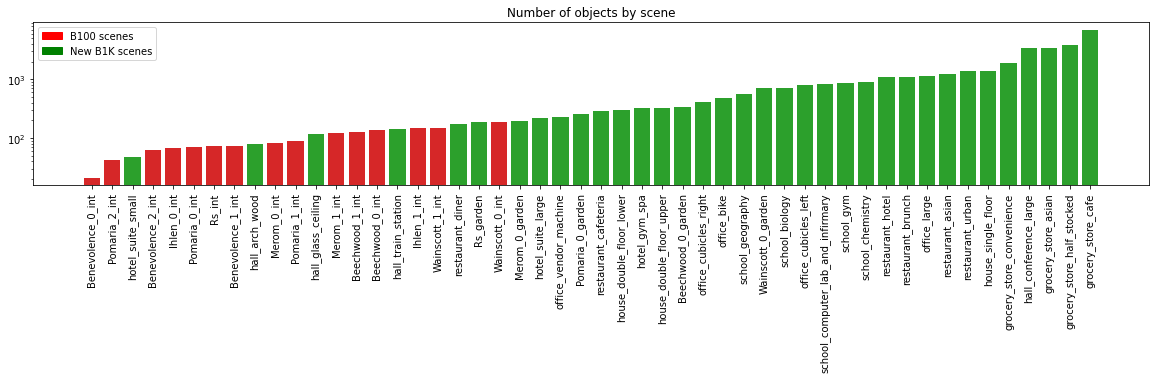

('grocery_store_cafe', 6994)


In [4]:
def plot_object_count(log=True):
    # Object count
    scenes = collections.Counter()

    for scene, rooms in data["scenes"].items():
        for room, categories in rooms.items():
            scenes[scene] += sum(categories.values())

    plt.rcParams["figure.figsize"] = (20,3)
    scenes_sorted = sorted(scenes.items(), key=lambda x: x[1])
    keys_sorted, vals_sorted = zip(*scenes_sorted)
    keys_sorted = list(keys_sorted)
    vals_sorted = list(vals_sorted)

    colors = {'B100 scenes':'red', 'New B1K scenes':'green'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)

    c = ["tab:red" if name[-4:] == "_int" else "tab:green" for name in keys_sorted]
    l = ['B100 scenes' if name[-4:] == "_int" else 'B1K new scenes' for name in keys_sorted]

    plt.title("Number of objects by scene")
    plt.bar(np.arange(len(scenes_sorted)), vals_sorted, tick_label=keys_sorted, color=c, label=l, log=log)
    # if not log:
    #     plt.ylim([0, 5000])
    plt.xticks(rotation = 90)
    plt.show()
    print(list(zip(keys_sorted, vals_sorted))[-1])
    
plot_object_count(False)
plot_object_count(True)

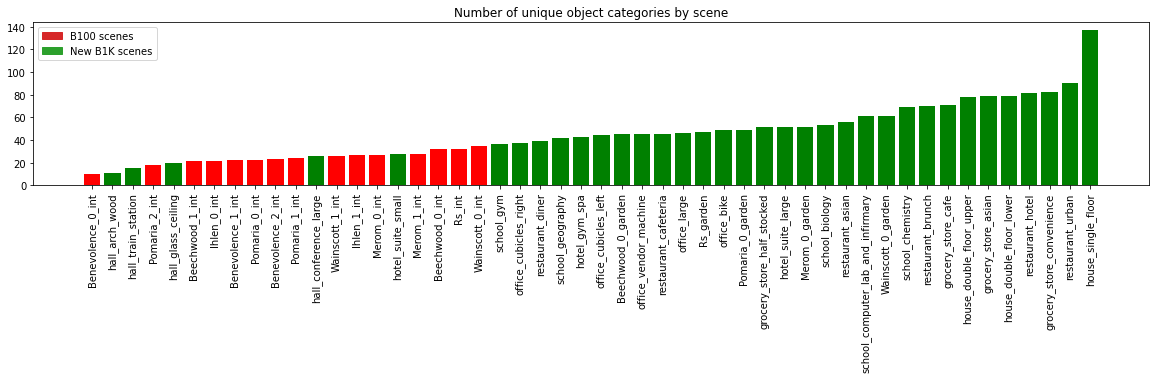

('house_single_floor', 137)


In [5]:
def plot_synset_count():
    # Object count
    scenes = collections.defaultdict(set)

    for scene, rooms in data["scenes"].items():
        for room, categories in rooms.items():
            scenes[scene].update(categories.keys())

    plt.rcParams["figure.figsize"] = (20,3)
    scenes_sorted = sorted([(x, len(y)) for x, y in scenes.items()], key=lambda x: x[1])
    keys_sorted, vals_sorted = zip(*scenes_sorted)
    keys_sorted = list(keys_sorted)
    vals_sorted = list(vals_sorted)

    colors = {'B100 scenes':'tab:red', 'New B1K scenes':'tab:green'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)

    c = ["red" if name[-4:] == "_int" else "green" for name in keys_sorted]
    l = ['B100 scenes' if name[-4:] == "_int" else 'B1K new scenes' for name in keys_sorted]

    plt.title("Number of unique object categories by scene")
    plt.bar(np.arange(len(scenes_sorted)), vals_sorted, tick_label=keys_sorted, color=c, label=l)
    plt.xticks(rotation = 90)
    plt.show()
    
    print(list(zip(keys_sorted, vals_sorted))[-1])
    
plot_synset_count()

In [9]:
key_order = ["Beechwood_0_int", "Beechwood_1_int", "Benevolence_0_int", "Benevolence_1_int", "Benevolence_2_int", "Ihlen_0_int", "Ihlen_1_int", "Merom_0_int", "Merom_1_int", "Pomaria_0_int", "Pomaria_1_int", "Pomaria_2_int", "Rs_int", "Wainscott_0_int", "Wainscott_1_int", "Beechwood_0_garden", "Rs_garden", "Pomaria_0_garden", "Merom_0_garden", "Wainscott_0_garden", "house_single_floor", "house_double_floor_lower", "house_double_floor_upper", "grocery_store_asian", "grocery_store_cafe", "grocery_store_convenience", "grocery_store_half_stocked", "hall_arch_wood", "hall_train_station", "hall_glass_ceiling", "hall_conference_large", "hotel_suite_large", "hotel_suite_small", "hotel_gym_spa", "office_bike", "office_cubicles_left", "office_cubicles_right", "office_large", "office_vendor_machine", "restaurant_asian", "restaurant_cafeteria", "restaurant_diner", "restaurant_brunch", "restaurant_urban", "restaurant_hotel", "school_gym", "school_geography", "school_biology", "school_chemistry", "school_computer_lab_and_infirmary"]

In [21]:
scenes = {}
for scene in key_order:
    rooms = data["scenes"][scene]
    room_count = len(rooms)
    room_types = ", ".join(sorted(set(x.rsplit("_", 1)[0] for x in rooms.keys())))
    
    categories = set()
    object_count = 0
    for room, room_categories in rooms.items():
        categories.update(room_categories.keys())
        object_count += sum(room_categories.values())
    category_count = len(categories)
    
    scenes[scene] = {"object_count": object_count, "synset_count": category_count, "room_count": room_count, "room_types": room_types, "example_activities": "TBD"}

In [26]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
df = pd.DataFrame.from_dict(scenes, "index")

In [27]:
df

,object_count,synset_count,room_count,room_types,example_activities
Beechwood_0_int,136,32,8,"bathroom, corridor, dining_room, entryway, kitchen, living_room, private_office, utility_room",TBD
Beechwood_1_int,129,21,9,"bathroom, bedroom, childs_room, closet, corridor, playroom, television_room",TBD
Benevolence_0_int,21,10,4,"bathroom, corridor, empty_room, entryway",TBD
Benevolence_1_int,74,22,5,"corridor, dining_room, kitchen, living_room, storage_room",TBD
Benevolence_2_int,63,23,5,"bathroom, bedroom, corridor",TBD
Ihlen_0_int,68,21,7,"bathroom, corridor, dining_room, garage, living_room, storage_room",TBD
Ihlen_1_int,147,27,9,"bathroom, bedroom, corridor, dining_room, kitchen, living_room, staircase",TBD
Merom_0_int,82,27,6,"bathroom, childs_room, living_room, playroom, storage_room, utility_room",TBD
Merom_1_int,123,28,8,"bathroom, bedroom, childs_room, corridor, dining_room, kitchen, living_room, staircase",TBD
Pomaria_0_int,71,22,6,"bathroom, bedroom, corridor, private_office, television_room",TBD


In [29]:
total_rooms = df["room_count"].sum()
print(total_rooms)

306


In [30]:
with open(r"C:\Users\cgokmen\Downloads\object_inventory.json", "r") as f:
    data2 = json.load(f)

In [34]:
models = {x for x in data2["providers"].keys()}
cats = {x.split("-")[0] for x in models}

model_count = len(models) + 745
cat_count = len(cats) + 745

print("Models", model_count)
print("Cats", cat_count)

Models 3324
Cats 1224
